In [372]:
## Importing the required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

In [373]:
# Importing the dataset
data = pd.read_csv("Dig_Tickets.csv" ,parse_dates=["REQUESTDATE","DIGDATE","EXPIRATIONDATE"])

In [374]:
data.head()

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT,41.728893,-87.580533
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277


In [375]:
### shape
data.shape

(1084502, 16)

In [376]:
data.columns

Index(['DIG_TICKET#', 'PERMIT#', 'REQUESTDATE', 'EMERGENCY', 'STNOFROM',
       'STNOTO', 'DIRECTION', 'STNAME', 'SUFFIX', 'PLACEMENT', 'DIGDATE',
       'EXPIRATIONDATE', 'PRIMARYCONTACTFIRST', 'PRIMARYCONTACTLAST',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084502 entries, 0 to 1084501
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DIG_TICKET#          1084502 non-null  int64         
 1   PERMIT#              908226 non-null   object        
 2   REQUESTDATE          1084502 non-null  datetime64[ns]
 3   EMERGENCY            1084502 non-null  bool          
 4   STNOFROM             1084498 non-null  float64       
 5   STNOTO               1084496 non-null  float64       
 6   DIRECTION            1084502 non-null  object        
 7   STNAME               1084502 non-null  object        
 8   SUFFIX               1073630 non-null  object        
 9   PLACEMENT            897081 non-null   object        
 10  DIGDATE              1084461 non-null  datetime64[ns]
 11  EXPIRATIONDATE       1084158 non-null  datetime64[ns]
 12  PRIMARYCONTACTFIRST  65990 non-null    object        
 1

In [378]:
data.nunique()

DIG_TICKET#            1084502
PERMIT#                 287640
REQUESTDATE               2278
EMERGENCY                    2
STNOFROM                 11700
STNOTO                   11951
DIRECTION                    4
STNAME                    1574
SUFFIX                      20
PLACEMENT                  519
DIGDATE                   2254
EXPIRATIONDATE            2303
PRIMARYCONTACTFIRST       6973
PRIMARYCONTACTLAST       11693
LATITUDE                407711
LONGITUDE               407541
dtype: int64

In [379]:
data.isna().sum()

DIG_TICKET#                  0
PERMIT#                 176276
REQUESTDATE                  0
EMERGENCY                    0
STNOFROM                     4
STNOTO                       6
DIRECTION                    0
STNAME                       0
SUFFIX                   10872
PLACEMENT               187421
DIGDATE                     41
EXPIRATIONDATE             344
PRIMARYCONTACTFIRST    1018512
PRIMARYCONTACTLAST           4
LATITUDE                  2535
LONGITUDE                 2535
dtype: int64

In [380]:
(data.isnull().sum()/(len(data)))*100 ### percentage of missing values

DIG_TICKET#             0.000000
PERMIT#                16.254096
REQUESTDATE             0.000000
EMERGENCY               0.000000
STNOFROM                0.000369
STNOTO                  0.000553
DIRECTION               0.000000
STNAME                  0.000000
SUFFIX                  1.002488
PLACEMENT              17.281757
DIGDATE                 0.003781
EXPIRATIONDATE          0.031720
PRIMARYCONTACTFIRST    93.915180
PRIMARYCONTACTLAST      0.000369
LATITUDE                0.233748
LONGITUDE               0.233748
dtype: float64

In [381]:
# Replacing the column names
data.columns = data.columns.str.replace('#', '_ID') 
data.head()

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT,41.728893,-87.580533
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277


In [382]:
emer= data[data["EMERGENCY"]==True]

In [383]:
### street where most the most emergency tickets raised
emergency_st_suffix = emer["SUFFIX"].value_counts()
emergency_st_suffix

SUFFIX
AVE     25675
ST      13392
PL       1764
RD       1113
BLVD      959
DR        487
PKWY      148
HWY       138
CT         89
TER        45
PARK        5
WAY         4
EXPY        2
SR          2
LN          1
Name: count, dtype: int64

In [384]:
data_2 = data.copy()

In [385]:
data_2.head()

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT,41.728893,-87.580533
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277


In [386]:
# Concating the fist and last name of the company or person 
data_2['PRIMARYCONTACT'] = data_2['PRIMARYCONTACTFIRST'].astype(str).str.cat(data_2['PRIMARYCONTACTLAST'].astype(str), sep=' ')

In [387]:
data_2["PRIMARYCONTACT"] = data_2["PRIMARYCONTACT"].str.replace("nan", "")

In [388]:
data_2.head()

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE,PRIMARYCONTACT
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337,WATER MANAGEMENT (TONY)
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297,DWM
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT,41.728893,-87.580533,WATER MANAGEMENT
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807,DWM
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277,WATER MANAGEMENT (DAN)


In [389]:
# Droping the columns
data_2.drop(['PRIMARYCONTACTFIRST','PRIMARYCONTACTLAST'], axis = 1,inplace=True)

In [390]:
data_2['PLACEMENT'].fillna('Private Property', inplace=True)

In [391]:
# Assumptions - Missing values in the "PLACEMENT" tends to Private Property
data_2['PROPERTY'] = data_2['PLACEMENT'].apply(lambda x: 'Public Property' if x != 'Private Property' else x)

In [392]:
missing_dig_date = data_2[data_2["DIGDATE"].isna()]
missing_dig_date

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY
50230,600442786,NaN,2018-04-24,False,10000.0,10000.0,W,OHARE AIRPORT,NaN,Private Property,NaT,2019-05-10,41.979729,-87.902322,"LINDAHL BROTHERS, INC.*",Private Property
70608,600463691,NaN,2018-05-30,False,248.0,302.0,W,HARRISON,ST,Private Property,NaT,2019-07-03,41.874352,-87.635010,"LINDAHL BROTHERS, INC.",Private Property
102011,600496133,NaN,2018-07-25,False,10000.0,10000.0,W,OHARE,ST,Private Property,NaT,2019-02-21,41.976201,-87.905309,"LINDAHL BROTHERS, INC.*",Private Property
113005,600507462,NaN,2018-08-13,False,5315.0,5315.0,N,MAGNOLIA,AVE,Private Property,NaT,2018-09-10,41.978617,-87.661059,"AFFORDABLE PLUMBING & SEWER, LTD",Private Property
114312,600508795,NaN,2018-08-14,False,10000.0,10000.0,W,OHARE AIRPORT,NaN,Private Property,NaT,2019-01-24,41.979729,-87.902322,"LINDAHL BROTHERS, INC.*",Private Property
141683,600536991,NaN,2018-10-01,False,211.0,211.0,S,LAFLIN,ST,Private Property,NaT,2018-10-29,41.878590,-87.664196,JASCO ELECTRIC CORPORATION,Private Property
163601,600559641,NaN,2018-11-06,False,10000.0,10000.0,W,OHARE,ST,Private Property,NaT,2019-01-24,41.976201,-87.905309,"LINDAHL BROTHERS, INC.*",Private Property
170526,600566783,NaN,2018-11-20,True,6840.0,6840.0,N,SACRAMENTO,AVE,Private Property,NaT,2018-11-25,42.005991,-87.704726,"MEADE, INC.",Private Property
183479,600580236,NaN,2018-12-27,True,3041.0,3041.0,W,IRVING PARK,RD,Private Property,NaT,2019-01-01,41.953830,-87.704805,Peoples Gas,Private Property
213830,600611510,NaN,2019-03-20,True,2010.0,2010.0,S,PULASKI,RD,Private Property,NaT,2019-03-25,41.854017,-87.724968,ELECTRIC CONDUIT CONSTRUCTION CO DBA MIDWESTE...,Private Property


In [393]:
missing_dig_date.shape

(41, 16)

In [394]:
missing_dig_date["PROPERTY"].unique()

array(['Private Property'], dtype=object)

In [395]:
missing_dig_date["PRIMARYCONTACT"].value_counts().head()

PRIMARYCONTACT
 Peoples Gas                                           6
 LINDAHL BROTHERS, INC.*                               5
 DWM                                                   5
 ELECTRIC CONDUIT CONSTRUCTION CO DBA MIDWESTERN CO    3
 TARMONBARRY LLC DBA KEENAN SEWER & WATER              2
Name: count, dtype: int64

In [396]:

data_2.dropna(subset=['DIGDATE'], inplace=True)

In [397]:
missing_exp = data_2[data_2["EXPIRATIONDATE"].isna()]
missing_exp

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY
3882,600395378,DOT904679,2018-01-10,False,909.0,909.0,W,87TH,ST,"SIDEWALK,PARKWAY",2018-01-12,NaT,41.735922,-87.646526,DWM,Public Property
3899,600395395,DOT904690,2018-01-10,False,1531.0,1531.0,E,MARQUETTE,RD,"SIDEWALK,PARKWAY",2018-01-12,NaT,41.775055,-87.587600,DWM,Public Property
182998,600579741,DOT1046698,2018-12-26,False,11332.0,11332.0,S,WALLACE,ST,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-12-28,NaT,41.687783,-87.637542,DWM,Public Property
310194,600711816,DOT1080328,2019-09-11,False,7501.0,7521.0,S,WESTERN,AVE,"INTERSECT,SIDEWALK,PARKWAY",2019-09-13,NaT,41.757059,-87.682890,Peoples Gas,Public Property
314084,600715864,DOT1158984,2019-09-18,False,4502.0,4502.0,S,LEAMINGTON,AVE,CURBLANE,2019-09-20,NaT,41.811013,-87.751956,DWM,Public Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913777,601345472,NaN,2023-05-01,False,3412.0,3412.0,N,TRIPP,AVE,Private Property,2023-05-05,NaT,41.943080,-87.733610,Andrew Erskine,Private Property
951805,601384577,NaN,2023-06-27,False,3416.0,3416.0,N,KEELER,AVE,Private Property,2023-06-30,NaT,41.943172,-87.732287,Karol Grzesiak,Private Property
998142,601432132,NaN,2023-09-11,False,2201.0,2219.0,W,69TH,ST,Private Property,2023-09-14,NaT,41.768488,-87.679206,Granite Construction Company*,Private Property
999892,601433918,NaN,2023-09-13,False,2310.0,2310.0,N,OAKLEY,AVE,Private Property,2023-09-22,NaT,41.923786,-87.685317,Kevin Gallagher,Private Property


In [398]:
missing_exp["PROPERTY"].unique()

array(['Public Property', 'Private Property'], dtype=object)

In [399]:
missing_exp["EMERGENCY"].unique()

array([False])

In [400]:
missing_exp["PRIMARYCONTACT"].value_counts().head()

PRIMARYCONTACT
 SEVEN-D CONSTRUCTION CO*    31
 DWM                         26
 Peoples Gas                 25
 SANCHEZ PAVING**            21
 M & J ASPHALT *             18
Name: count, dtype: int64

In [401]:
data_2.dropna(subset=['EXPIRATIONDATE'], inplace=True)

In [402]:
permit = data_2[data_2["PERMIT_ID"].notnull()]
permit

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,41.901572,-87.652297,DWM,Public Property
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,41.909577,-87.689807,DWM,Public Property
5,600391395,DOT901967,2018-01-01,False,5940.0,5940.0,N,RICHMOND,ST,PARKWAY,2018-01-04,2018-01-30,41.989122,-87.703145,DWM,Public Property
6,600391396,DOT901968,2018-01-01,False,4946.0,4946.0,W,POTOMAC,AVE,PARKWAY,2018-01-04,2018-01-30,41.904235,-87.750337,DWM,Public Property
7,600391397,DOT901969,2018-01-01,False,10047.0,10047.0,S,MORGAN,ST,PARKWAY,2018-01-04,2018-01-30,41.710890,-87.647656,DWM,Public Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084492,601520977,DOT1933681,2024-03-29,False,10504.0,10504.0,S,NORMAL,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2024-04-03,2024-04-26,41.703163,-87.635620,DWM,Public Property
1084493,601520978,DOT1933683,2024-03-29,False,9929.0,9929.0,S,MORGAN,ST,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2024-04-03,2024-04-26,41.713263,-87.647716,DWM,Public Property
1084494,601520979,DOT1933684,2024-03-29,False,8912.0,8912.0,S,WALLACE,ST,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2024-04-03,2024-04-26,41.732151,-87.638790,DWM,Public Property
1084495,601520980,DOT1933685,2024-03-29,False,4821.0,4821.0,N,CENTRAL PARK,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2024-04-03,2024-04-26,41.969006,-87.718125,DWM,Public Property


In [403]:
permit["PROPERTY"].value_counts()

PROPERTY
Public Property     896774
Private Property     11145
Name: count, dtype: int64

In [404]:
data_2["PERMIT"] = data_2["PERMIT_ID"].apply(lambda x: "Have Permit" if pd.notnull(x) else "Do not Have Permit")

In [405]:
data_2.head()

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY,PERMIT
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,Private Property,2018-01-01,2018-01-06,41.721458,-87.635337,WATER MANAGEMENT (TONY),Private Property,Do not Have Permit
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,41.901572,-87.652297,DWM,Public Property,Have Permit
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,Private Property,2018-01-01,2018-01-06,41.728893,-87.580533,WATER MANAGEMENT,Private Property,Do not Have Permit
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,41.909577,-87.689807,DWM,Public Property,Have Permit
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,Private Property,2018-01-01,2018-01-06,41.784475,-87.707277,WATER MANAGEMENT (DAN),Private Property,Do not Have Permit


In [406]:
freq_permit = data_2["PERMIT"].value_counts()
freq_permit

PERMIT
Have Permit           907919
Do not Have Permit    176198
Name: count, dtype: int64

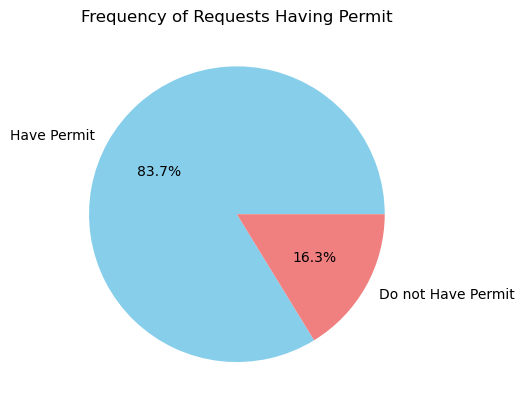

In [407]:
## Graphical representation of Emergency status

plt.pie(freq_permit, labels=freq_permit.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Add title
plt.title("Frequency of Requests Having Permit")

# Show plot
plt.show()

In [408]:
data_2.drop(['PERMIT_ID'], axis = 1,inplace=True)

In [409]:
data_2[data_2["LATITUDE"].isna()]

,DIG_TICKET_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY,PERMIT
1301,600392704,2018-01-03,False,2314.0,2314.0,S,COLES,NaN,Private Property,2018-01-08,2018-01-31,NaN,NaN,JF ELECTRIC,Private Property,Do not Have Permit
1713,600393119,2018-01-04,False,5303.0,5401.0,S,WENTWORTH,AVE,"ALLEY,CURBLANE,PARKWAY,SIDEWALK,TRAFFIC,INTERSECT",2018-01-08,2018-02-01,NaN,NaN,"HYDRO-EXCAVATING, INC*",Public Property,Have Permit
1714,600393120,2018-01-04,False,5403.0,5501.0,S,WENTWORTH,AVE,"ALLEY,CURBLANE,PARKWAY,SIDEWALK,TRAFFIC,INTERSECT",2018-01-08,2018-02-01,NaN,NaN,"HYDRO-EXCAVATING, INC*",Public Property,Have Permit
1715,600393121,2018-01-04,False,5503.0,5533.0,S,WENTWORTH,AVE,"ALLEY,CURBLANE,PARKWAY,SIDEWALK,TRAFFIC,INTERSECT",2018-01-08,2018-02-01,NaN,NaN,"HYDRO-EXCAVATING, INC*",Public Property,Have Permit
1808,600393215,2018-01-04,False,4750.0,4750.0,S,MERRIMAC,AVE,Private Property,2018-01-08,2018-02-01,NaN,NaN,ANDREW SPIEWAK LAND SURVEYOR INC,Private Property,Do not Have Permit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083462,601519916,2024-03-27,False,3300.0,3358.0,N,KENNEDY,EXPY,Private Property,2024-03-29,2024-04-24,NaN,NaN,MARTAM CONSTRUCTION,Private Property,Do not Have Permit
1083463,601519917,2024-03-27,False,3400.0,3458.0,N,KENNEDY,EXPY,Private Property,2024-03-29,2024-04-24,NaN,NaN,MARTAM CONSTRUCTION,Private Property,Do not Have Permit
1083491,601519945,2024-03-27,False,2900.0,2958.0,N,KENNEDY,EXPY,Private Property,2024-03-29,2024-04-24,NaN,NaN,MARTAM CONSTRUCTION,Private Property,Do not Have Permit
1084036,601520510,2024-03-28,False,6601.0,6601.0,W,GRAND,AVE,Private Property,2024-04-01,2024-04-25,NaN,NaN,ComED North*,Private Property,Do not Have Permit


In [410]:
data_2.dropna(subset=['LATITUDE'], inplace=True)

In [411]:
data_2.drop(['STNOFROM', 'STNOTO', 'STNAME', 'SUFFIX'], axis = 1,inplace=True)

In [412]:
data_2["REQ_YEAR"] = data_2["REQUESTDATE"].dt.year

In [413]:
data_2.head()

,DIG_TICKET_ID,REQUESTDATE,EMERGENCY,DIRECTION,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY,PERMIT,REQ_YEAR
0,600391390,2018-01-01,True,W,Private Property,2018-01-01,2018-01-06,41.721458,-87.635337,WATER MANAGEMENT (TONY),Private Property,Do not Have Permit,2018
1,600391391,2018-01-01,False,N,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,41.901572,-87.652297,DWM,Public Property,Have Permit,2018
2,600391392,2018-01-01,True,S,Private Property,2018-01-01,2018-01-06,41.728893,-87.580533,WATER MANAGEMENT,Private Property,Do not Have Permit,2018
3,600391393,2018-01-01,False,N,PARKWAY,2018-01-04,2018-01-30,41.909577,-87.689807,DWM,Public Property,Have Permit,2018
4,600391394,2018-01-01,True,W,Private Property,2018-01-01,2018-01-06,41.784475,-87.707277,WATER MANAGEMENT (DAN),Private Property,Do not Have Permit,2018


In [414]:
## Emergency -counts
freq_emergency = data_2["EMERGENCY"].value_counts()
freq_emergency

EMERGENCY
False    1037285
True       44297
Name: count, dtype: int64

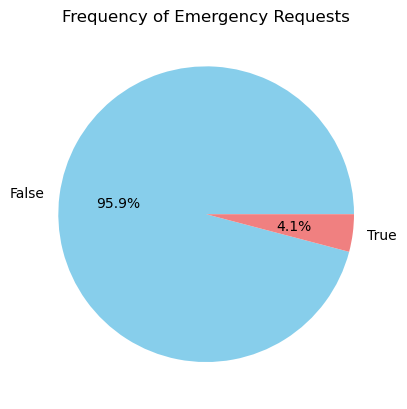

In [415]:
## Graphical representation of Emergency status

plt.pie(freq_emergency, labels=freq_emergency.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Add title
plt.title("Frequency of Emergency Requests")

# Show plot
plt.show()

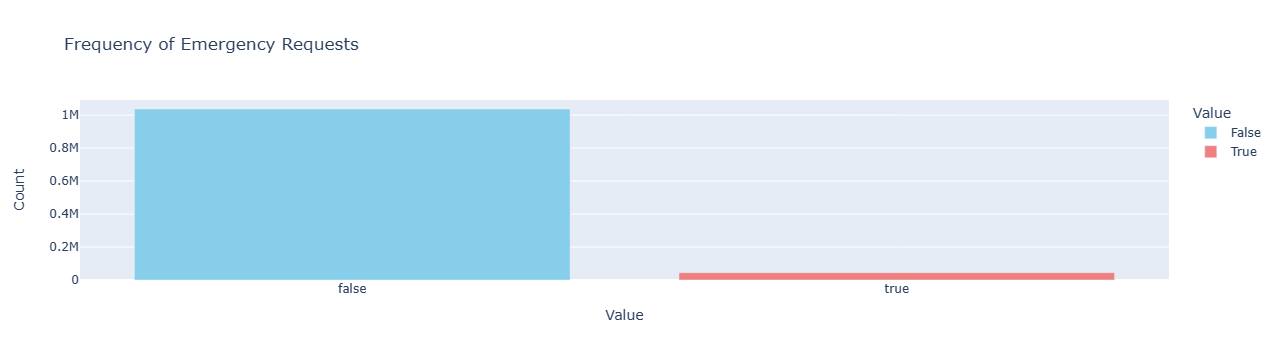

In [453]:
freq_emergency = data_2['EMERGENCY'].value_counts().reset_index()
freq_emergency.columns = ['Value', 'Count']

# Create an interactive bar plot with legends
fig = px.bar(freq_emergency, x='Value', y='Count', color='Value', labels={'Value': 'Value', 'Count': 'Count'}, 
             title='Frequency of Emergency Requests', 
             color_discrete_map={True: 'lightcoral', False: 'skyblue'})

# Show plot
fig.show()

In [286]:
freq_direction = data_2["DIRECTION"].value_counts()
freq_direction

DIRECTION
W    365204
S    360197
N    292828
E     63394
Name: count, dtype: int64

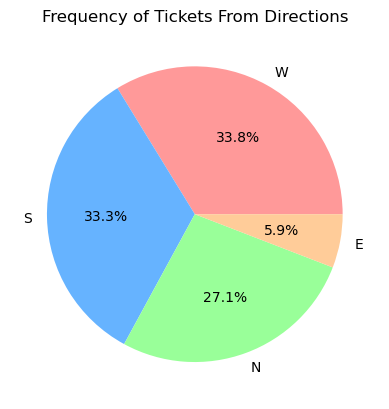

In [417]:
plt.pie(freq_direction, labels=freq_direction.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Add title
plt.title("Frequency of Tickets From Directions")

# Show plot
plt.show()

In [418]:
pd.crosstab(data_2['EMERGENCY'], data_2['DIRECTION'])

DIRECTION,E,N,S,W
EMERGENCY,,,,
False,61036,281326,343831,351092
True,2357,11492,16354,14094


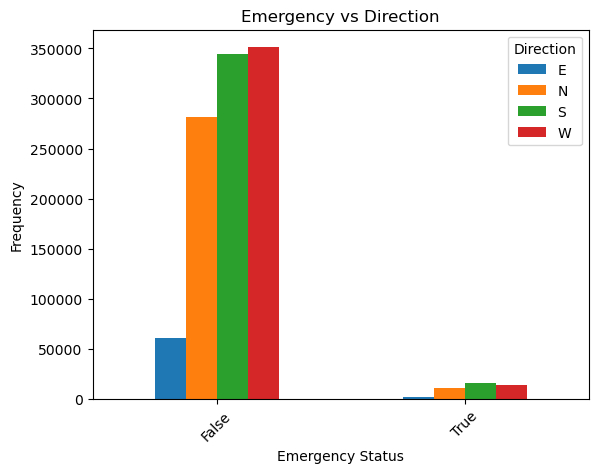

In [419]:
cross_tab = pd.crosstab(data_2['EMERGENCY'], data_2['DIRECTION'])

# Plot the grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.title('Emergency vs Direction')
plt.xlabel('Emergency Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Direction')
plt.show()

In [420]:
emergency= data_2[data_2["EMERGENCY"]==True]

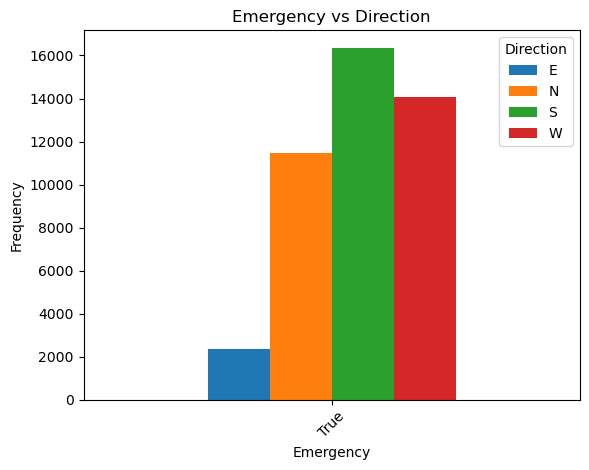

In [421]:
cross_tab = pd.crosstab(emergency['EMERGENCY'], emergency['DIRECTION'])

# Plot the grouped bar plot
cross_tab.plot(kind='bar', stacked=False)
plt.title('Emergency vs Direction')
plt.xlabel('Emergency')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Direction')
plt.show()

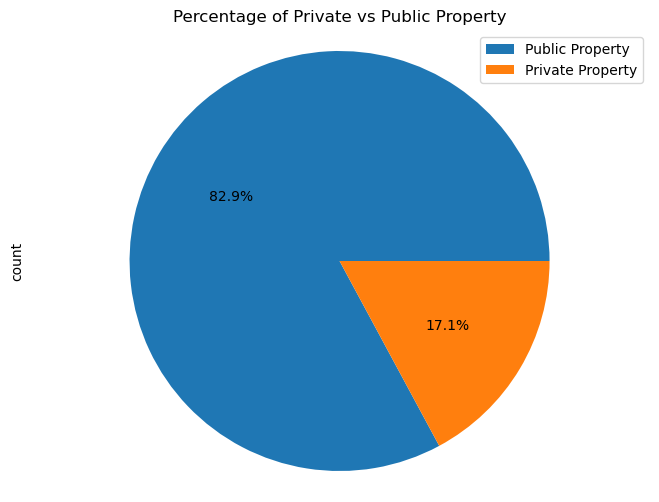

In [422]:
placement_counts = data_2["PROPERTY"].value_counts()

# Plot the percentages
plt.figure(figsize=(8, 6))
placement_counts.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('Percentage of Private vs Public Property')
plt.legend(labels=placement_counts.index, loc='upper right')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [423]:
# Filter data for Private Property excavations
private_property_data = data_2[data_2['PROPERTY'] == 'Private Property']

# Filter data for Public Property excavations
public_property_data = data_2[data_2['PROPERTY'] == 'Public Property']

In [424]:
top_private_companies = private_property_data['PRIMARYCONTACT'].value_counts().head(5)
top_private_companies

PRIMARYCONTACT
 Peoples Gas                                   11434
 DWM                                            9643
 MEADE ELECTRIC CO.,  INC.*                     3709
 CHRISTY WEBBER & CO*                           2876
 City of Chicago (Dept of Water Management)     2248
Name: count, dtype: int64

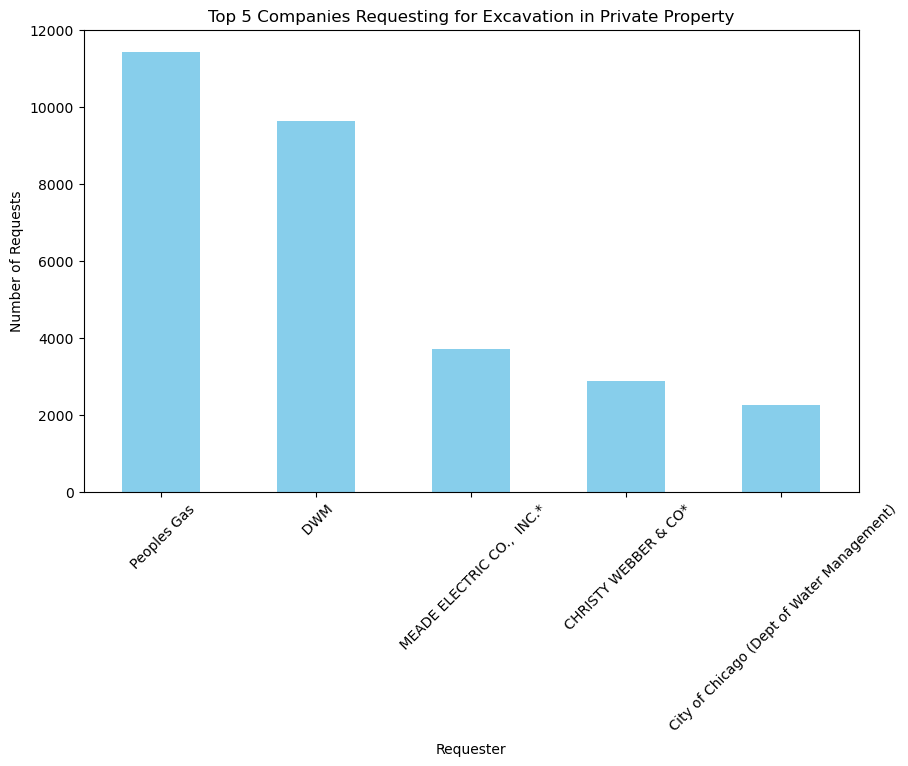

In [425]:
plt.figure(figsize=(10, 6))
top_private_companies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies Requesting for Excavation in Private Property')
plt.xlabel('Requester')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

In [426]:
top_public_companies = public_property_data['PRIMARYCONTACT'].value_counts().head(5)
top_public_companies

PRIMARYCONTACT
 DWM                           106338
 SEVEN-D CONSTRUCTION CO*       74140
 Peoples Gas                    61847
 NPL CONSTRUCTION*              39721
 MEADE ELECTRIC CO.,  INC.*     38178
Name: count, dtype: int64

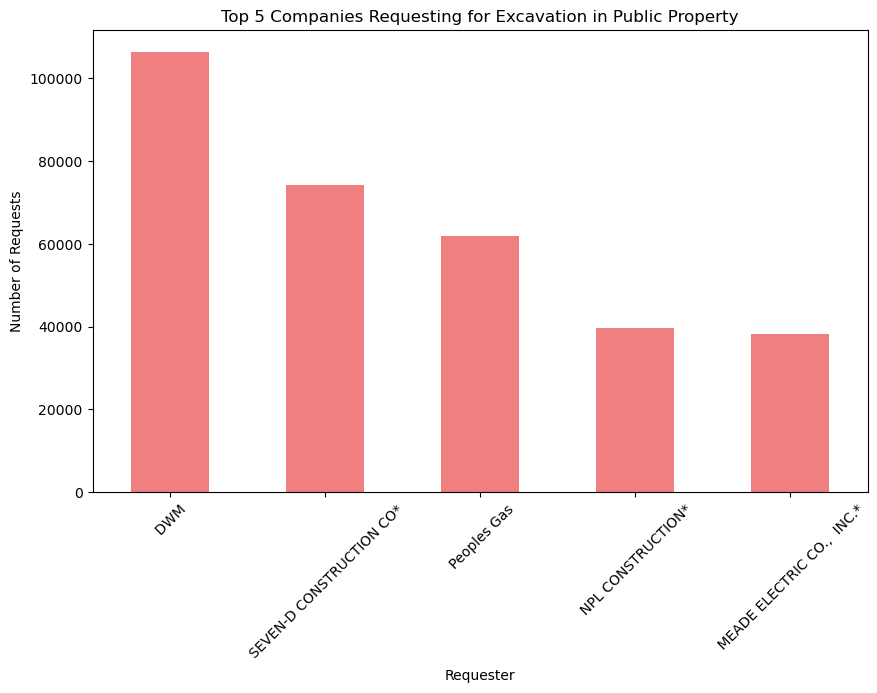

In [427]:
plt.figure(figsize=(10, 6))
top_public_companies.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Companies Requesting for Excavation in Public Property')
plt.xlabel('Requester')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

In [428]:
pd.crosstab(data_2['EMERGENCY'], data_2['PROPERTY'])

PROPERTY,Private Property,Public Property
EMERGENCY,,
False,142033,895252
True,43247,1050


In [429]:
emer_private_prop = data_2[(data_2["EMERGENCY"] == True) & (data_2["PROPERTY"] == "Private Property")]

In [430]:
emer_public_prop = data_2[(data_2["EMERGENCY"] == True) & (data_2["PROPERTY"] == "Public Property")]

In [431]:
top_private_emer_companies = emer_private_prop['PRIMARYCONTACT'].value_counts().head(5)
top_private_emer_companies

PRIMARYCONTACT
 DWM                                                  9470
 Peoples Gas                                          8586
 City of Chicago (Dept of Water Management)           2227
 INTEGRYS ENERGY GROUP /  PEOPLES GAS                 1743
 KS ENERGY SERVICES, LLC (OVERSIZE)(PARENT-ARTERA)    1590
Name: count, dtype: int64

In [432]:
top_public_emer_companies = emer_public_prop['PRIMARYCONTACT'].value_counts().head(5)
top_public_emer_companies

PRIMARYCONTACT
 DWM                                         446
 BRODERICK & SON PLUMBING & SEWERS CORP*      39
 RANGER CONSTRUCTION INC*                     37
 CASSIDY EXCAVATING  INC*                     32
 TARMONBARRY LLC DBA KEENAN SEWER & WATER     26
Name: count, dtype: int64

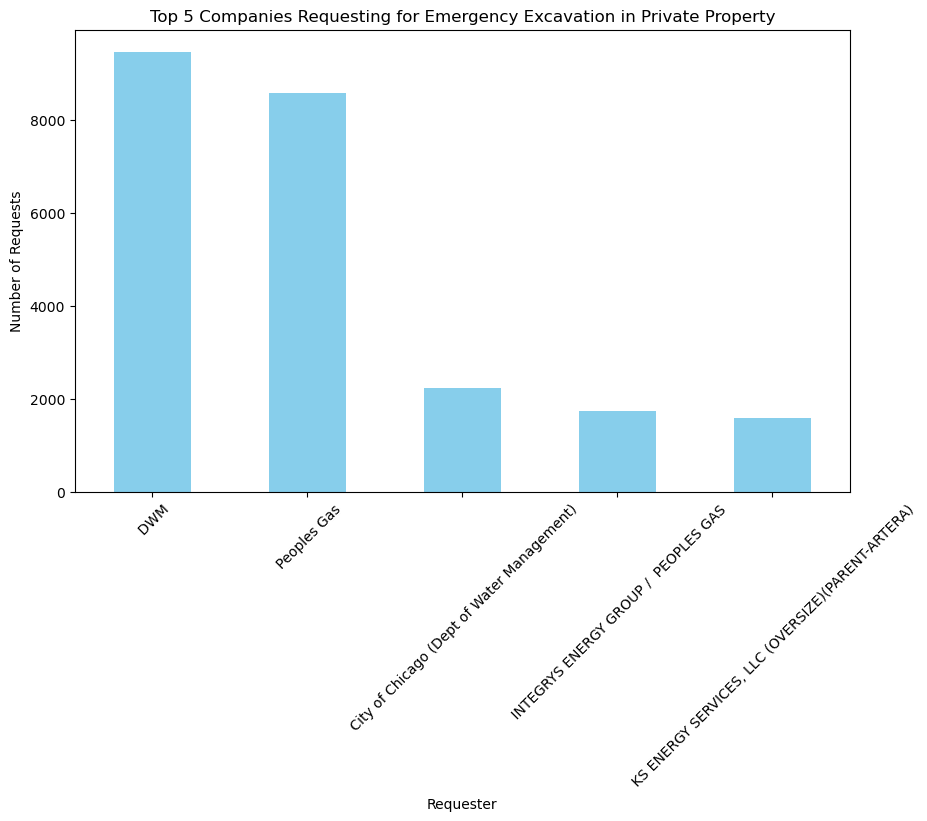

In [433]:
plt.figure(figsize=(10, 6))
top_private_emer_companies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies Requesting for Emergency Excavation in Private Property')
plt.xlabel('Requester')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

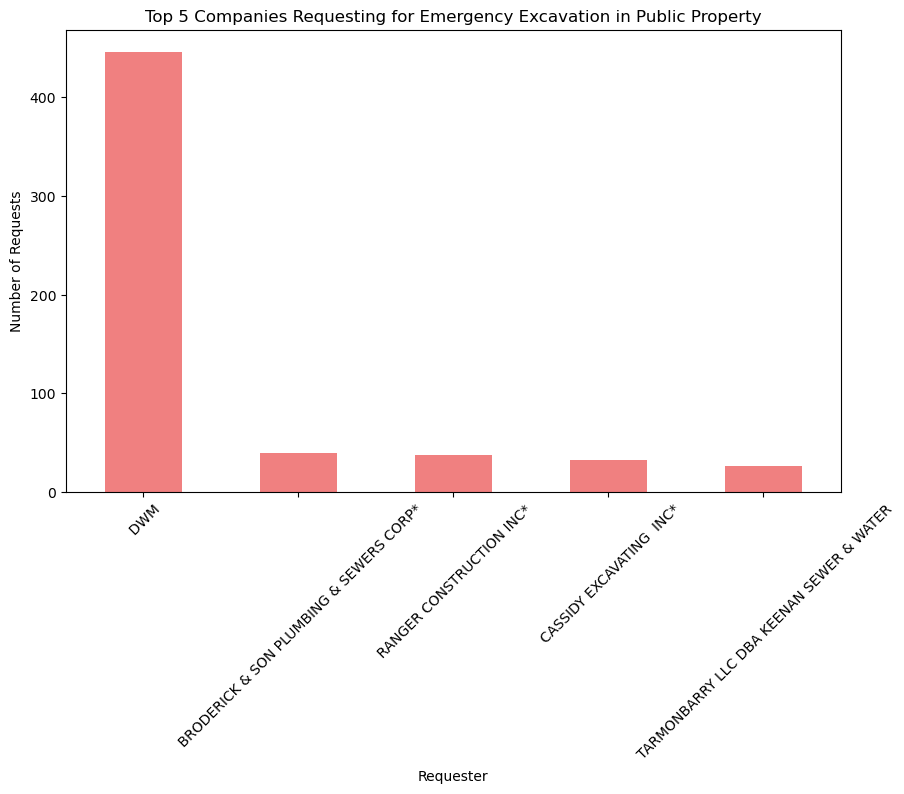

In [434]:
plt.figure(figsize=(10, 6))
top_public_emer_companies.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Companies Requesting for Emergency Excavation in Public Property')
plt.xlabel('Requester')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

In [435]:
yearly_tickets = data_2.groupby("REQ_YEAR").size()

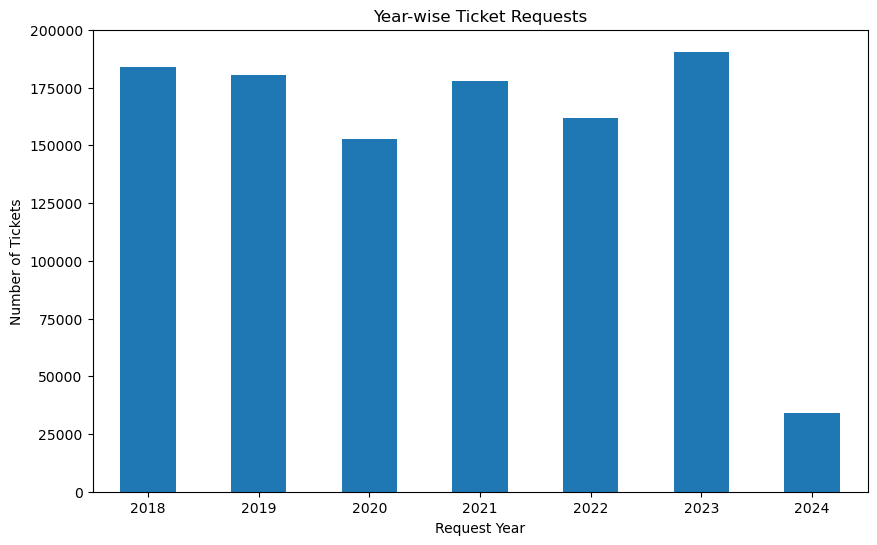

In [436]:
plt.figure(figsize=(10, 6))
yearly_tickets.plot(kind="bar", xlabel="Request Year", ylabel="Number of Tickets", title="Year-wise Ticket Requests")
plt.xticks(rotation=360)
plt.show()

<Axes: title={'center': 'Year-wise Requests (Emergency and Non-emergency)'}, xlabel='Year', ylabel='Number of Requests'>

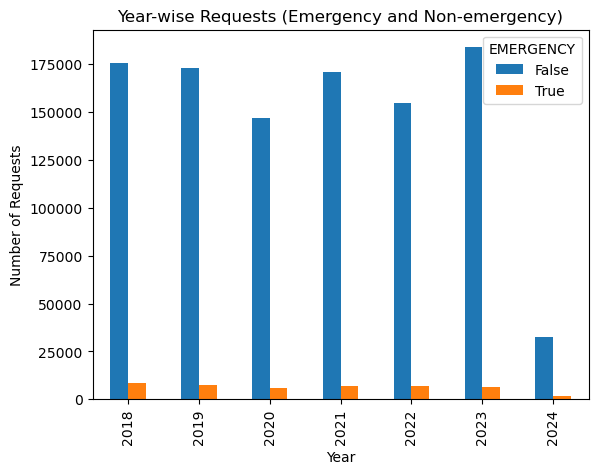

In [437]:
yearly_emer_requests = data_2.groupby(['REQ_YEAR', 'EMERGENCY']).size().unstack(fill_value=0)

# Visualize requests counts year-wise for both emergency and non-emergency
yearly_emer_requests.plot(kind='bar', stacked=False, xlabel='Year', ylabel='Number of Requests', title='Year-wise Requests (Emergency and Non-emergency)')

In [438]:
pd.crosstab(data_2["EMERGENCY"],data_2["REQ_YEAR"])

REQ_YEAR,2018,2019,2020,2021,2022,2023,2024
EMERGENCY,,,,,,,
False,175648,172987,146888,170782,154771,183900,32309
True,8336,7388,5996,6999,7057,6611,1910


In [439]:
data_3 = data_2.copy()

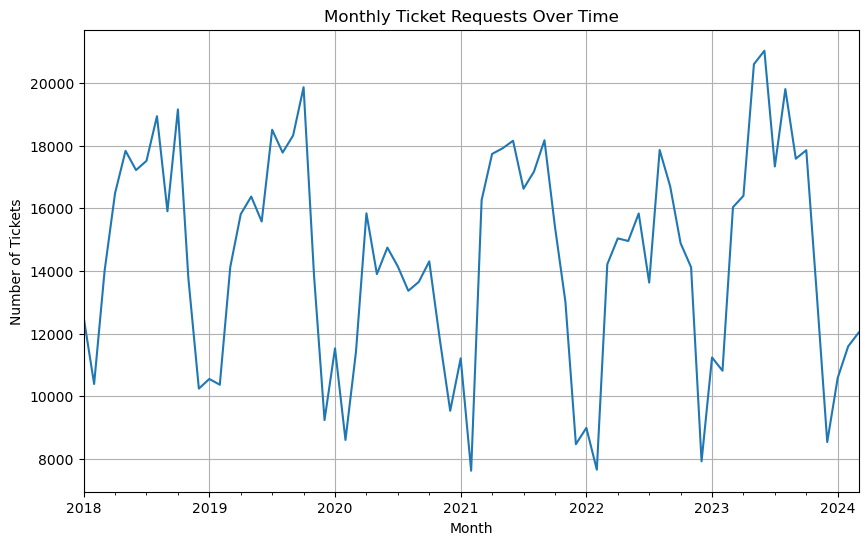

In [440]:
data_3.set_index('REQUESTDATE', inplace=True)

# Resample data by month and count the number of tickets per month
monthly_tickets = data_3.resample('M').size()

# Plot the time series graph
plt.figure(figsize=(10, 6))
monthly_tickets.plot()
plt.title('Monthly Ticket Requests Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.show()

In [441]:
data_2["TICKETS_VALID_FOR"] = data_2["EXPIRATIONDATE"] - data_2["REQUESTDATE"]

In [442]:
data_2.head()

,DIG_TICKET_ID,REQUESTDATE,EMERGENCY,DIRECTION,PLACEMENT,DIGDATE,EXPIRATIONDATE,LATITUDE,LONGITUDE,PRIMARYCONTACT,PROPERTY,PERMIT,REQ_YEAR,TICKETS_VALID_FOR
0,600391390,2018-01-01,True,W,Private Property,2018-01-01,2018-01-06,41.721458,-87.635337,WATER MANAGEMENT (TONY),Private Property,Do not Have Permit,2018,5 days
1,600391391,2018-01-01,False,N,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,41.901572,-87.652297,DWM,Public Property,Have Permit,2018,29 days
2,600391392,2018-01-01,True,S,Private Property,2018-01-01,2018-01-06,41.728893,-87.580533,WATER MANAGEMENT,Private Property,Do not Have Permit,2018,5 days
3,600391393,2018-01-01,False,N,PARKWAY,2018-01-04,2018-01-30,41.909577,-87.689807,DWM,Public Property,Have Permit,2018,29 days
4,600391394,2018-01-01,True,W,Private Property,2018-01-01,2018-01-06,41.784475,-87.707277,WATER MANAGEMENT (DAN),Private Property,Do not Have Permit,2018,5 days


In [443]:
data_2["TICKETS_VALID_FOR"].unique()

<TimedeltaArray>
[  '5 days',  '29 days',  '28 days',  '42 days',  '27 days',  '66 days',
  '25 days',  '15 days',  '18 days',  '13 days',
 ...
 '332 days', '320 days', '324 days', '426 days', '421 days', '338 days',
 '399 days', '378 days', '352 days', '302 days']
Length: 531, dtype: timedelta64[ns]

In [444]:
data_4 = data_2.copy()

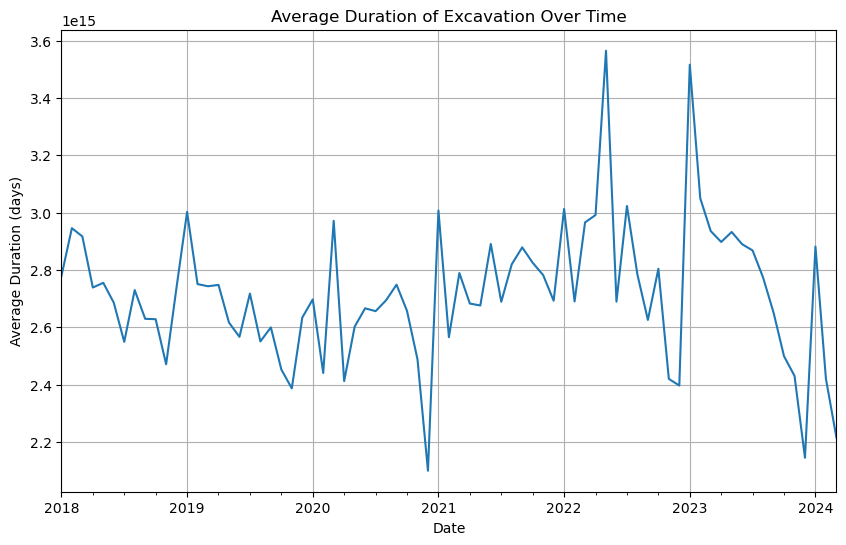

Average duration of excavation permits: 31 days 12:25:47.812740966


In [445]:
# Calculate average duration of excavation permits
average_duration = data_4['TICKETS_VALID_FOR'].mean()

# Visualize trends over time (assuming 'REQUESTDATE' is datetime)
data_4['REQUESTDATE'] = pd.to_datetime(data_4['REQUESTDATE'])
data_4.set_index('REQUESTDATE', inplace=True)
average_duration_over_time = data_4['TICKETS_VALID_FOR'].resample('M').mean()

# Plot average duration over time
plt.figure(figsize=(10, 6))
average_duration_over_time.plot()
plt.title('Average Duration of Excavation Over Time')
plt.xlabel('Date')
plt.ylabel('Average Duration (days)')
plt.grid(True)
plt.show()

print("Average duration of excavation permits:", average_duration)

In [446]:
data_2.columns

Index(['DIG_TICKET_ID', 'REQUESTDATE', 'EMERGENCY', 'DIRECTION', 'PLACEMENT',
       'DIGDATE', 'EXPIRATIONDATE', 'LATITUDE', 'LONGITUDE', 'PRIMARYCONTACT',
       'PROPERTY', 'PERMIT', 'REQ_YEAR', 'TICKETS_VALID_FOR'],
      dtype='object')

In [447]:
data_4 = data_2.copy()

In [448]:
import geopandas as gpd

# Load data into a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['LONGITUDE'], data['LATITUDE']))



In [449]:
gdf.head()

,DIG_TICKET_ID,PERMIT_ID,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE,geometry
0,600391390,NaN,2018-01-01,True,445.0,445.0,W,95TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337,POINT (-87.63534 41.72146)
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297,POINT (-87.65230 41.90157)
2,600391392,NaN,2018-01-01,True,9124.0,9124.0,S,CREGIER,AVE,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT,41.728893,-87.580533,POINT (-87.58053 41.72889)
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807,POINT (-87.68981 41.90958)
4,600391394,NaN,2018-01-01,True,3338.0,3338.0,W,60TH,ST,NaN,2018-01-01,2018-01-06,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277,POINT (-87.70728 41.78447)


In [450]:
# Load the map of Chicago (you may need to adjust the file path)
chicago_map = gpd.read_file('/path/to/chicago_shapefile.shp')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Spatial Distribution of Excavation Activities in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


DriverError: '/path/to/chicago_shapefile.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [451]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition using STL
decomposition = seasonal_decompose(monthly_tickets, model='additive', period=12)  # Assuming yearly seasonality

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


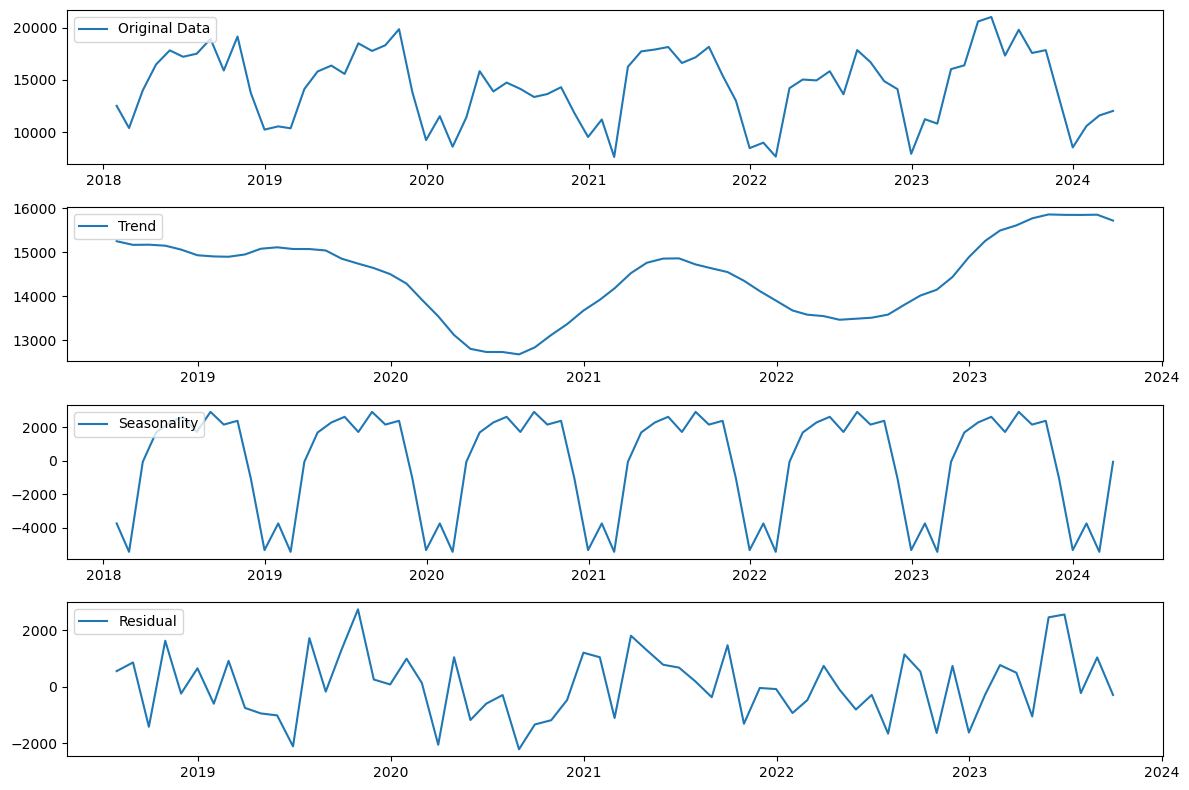

In [452]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_tickets, label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()